In [1]:
import os
import json
import numpy as np
import helper
import correlation_functions as cf
import preprocessing as pp

TRAINING_DATA_FOLDER_NAME = 'arcdata/training'
fileNames = os.listdir(TRAINING_DATA_FOLDER_NAME)
fileNames = list(filter(lambda x: 'label' not in x, fileNames))
jsonList = []
for j in fileNames:
    with open(TRAINING_DATA_FOLDER_NAME +"/" + j,"r") as file:
        jsonList.append(json.load(file))

---
Let's take a look at training example "a79310a0.json".
The main goal is to move the cyan colored object one down and also change the color to red.
So - how is it possible to make some conclusions from the correlations?

-> By looking at the values "same object", we can see, that all the objects in the grid are only the same by shape, not by position or color (this means independent position and independent color):
```
same objects, idp pos, fix col:
-
same objects, fix pos, fix col:
-
same objects, fix pos, idp col:
-
same objects, idp pos, idp col:
[[8. 8.]
 [8. 8.]]
```

This means, the fuzzy logic can assume thanks to these parameters, that the object needs to move and needs to change the color.
With other parameters like the color from the input- and output-object and their relative positions, it is possible to find all necessary steps to execute and finding a solution.

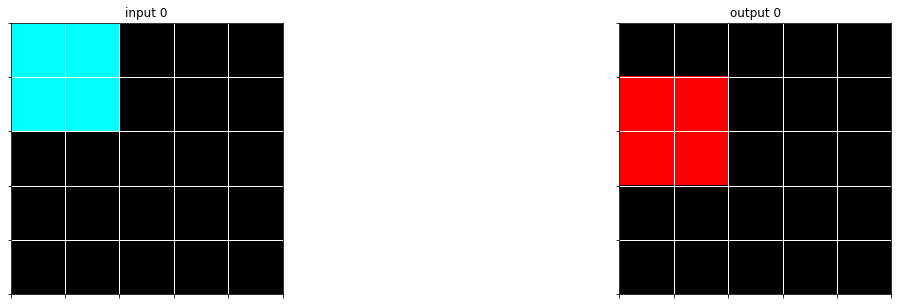

same shape:  True
(5, 5)
(5, 5)
same colors:  False
same size:  True
4
4
same color count:  False
Counter({0: 21, 8: 4})
Counter({0: 21, 2: 4})
color diff:  Counter({8: 4, 0: 0, 2: -4})
same objects, idp pos, fix col: 
same objects, fix pos, fix col: 
same objects, fix pos, idp col: 
same objects, idp pos, idp col: 
[[8. 8.]
 [8. 8.]]
Diff:  [[ 8  8  0  0  0]
 [ 6  6  0  0  0]
 [-2 -2  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


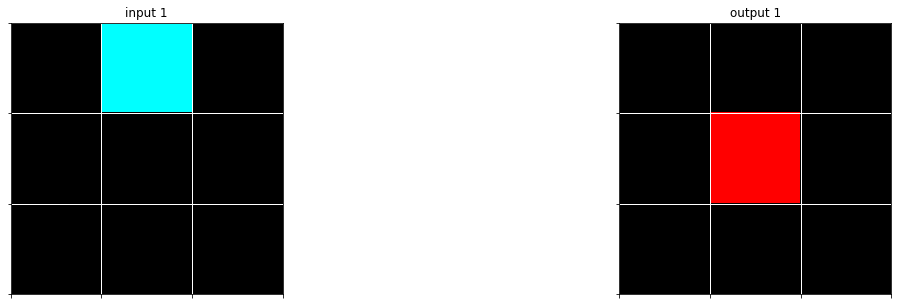

same shape:  True
(3, 3)
(3, 3)
same colors:  False
same size:  True
1
1
same color count:  False
Counter({0: 8, 8: 1})
Counter({0: 8, 2: 1})
color diff:  Counter({8: 1, 0: 0, 2: -1})
same objects, idp pos, fix col: 
same objects, fix pos, fix col: 
same objects, fix pos, idp col: 
same objects, idp pos, idp col: 
[[8.]]
Diff:  [[ 0  8  0]
 [ 0 -2  0]
 [ 0  0  0]]


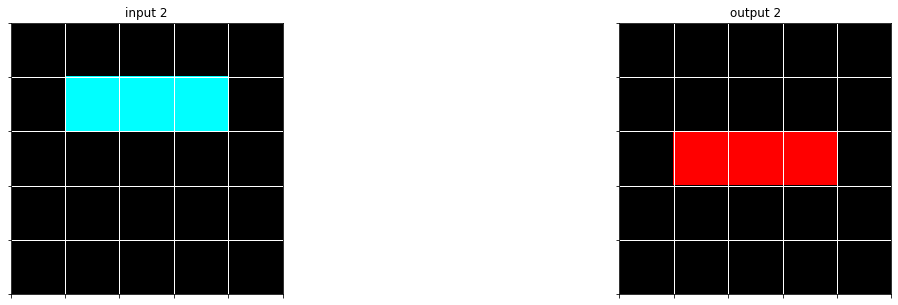

same shape:  True
(5, 5)
(5, 5)
same colors:  False
same size:  True
3
3
same color count:  False
Counter({0: 22, 8: 3})
Counter({0: 22, 2: 3})
color diff:  Counter({8: 3, 0: 0, 2: -3})
same objects, idp pos, fix col: 
same objects, fix pos, fix col: 
same objects, fix pos, idp col: 
same objects, idp pos, idp col: 
[[8. 8. 8.]]
Diff:  [[ 0  0  0  0  0]
 [ 0  8  8  8  0]
 [ 0 -2 -2 -2  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [2]:
from preprocessing import Grid

trainDatas = jsonList[260]['train']

to_preprocess = np.array([[np.array(trainData['input']),np.array(trainData['output'])] for i, trainData in enumerate(trainDatas)], dtype=object)
preprocessed = pp.preprocess(to_preprocess)
correlations = cf.correlate(preprocessed)


for i, trainData in enumerate(trainDatas):
    helper.displayIO([[np.array(trainData['input']),f'input {i}'],[np.array(trainData['output']),f'output {i}']])
    inputGrid = Grid(np.array(trainDatas[i]['input']))
    outputGrid = Grid(np.array(trainDatas[i]['output']))
    print("same shape: ", correlations[i].sameShape)
    print(inputGrid.shape)
    print(outputGrid.shape)
    print("same colors: ", correlations[i].sameColors)
    print("same size: ", correlations[i].sameSize)
    print(inputGrid.size)
    print(outputGrid.size)
    print("same color count: ", correlations[i].sameColorCount)
    print(correlations[i].color_count( inputGrid ))
    print(correlations[i].color_count( outputGrid))
    print("color diff: ", correlations[i].colorDiff)
    print("same objects, idp pos, fix col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsIdpPosFixCol):
        print(sameObject.raw)
    print("same objects, fix pos, fix col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsFixPosFixCol):
        print(sameObject.raw)
    print("same objects, fix pos, idp col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsFixPosIdpCol):
        print(sameObject.raw)
    print("same objects, idp pos, idp col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsIdpPosIdpCol):
        print(sameObject.raw)
    print("Diff: ", correlations[i].diff)


---
As a second example we look at training example "05f2a901.json".
The main goal is to move the red colored object to a specific direction, where it will collide with the blue one.
So - how is it possible to make some conclusions from the correlations?

-> By looking at the value "same color count", since it is true, it is clear that no colors get swapped and no other objects "spawn".
`same color count:  True`

-> By looking at the values "same object", we can see, that there is an object with `fix pos, fix col` (in this case the cyan colored). Therefore, it is clear that this one should never move and keeps the color.
--> Under `idp pos, fix col` is one more object listed, which means, that this one still has a fix color, but it does have an independent position (therefore not fix).
```
same objects, idp pos, fix col:
[[0. 2. 2. 2.]
 [2. 2. 0. 2.]]
[[8. 8.]
 [8. 8.]]
same objects, fix pos, fix col:
[[8. 8.]
 [8. 8.]]
same objects, fix pos, idp col:
[[8. 8.]
 [8. 8.]]
same objects, idp pos, idp col:
[[0. 2. 2. 2.]
 [2. 2. 0. 2.]]
[[8. 8.]
 [8. 8.]]
```

This means, the fuzzy logic can assume thanks to these parameters, that the red object needs to move and the other object can be as it is.
With other parameters like the *position* of the cyan colored and the *shape* of the red, it is possible to find the distance how far it has to move.

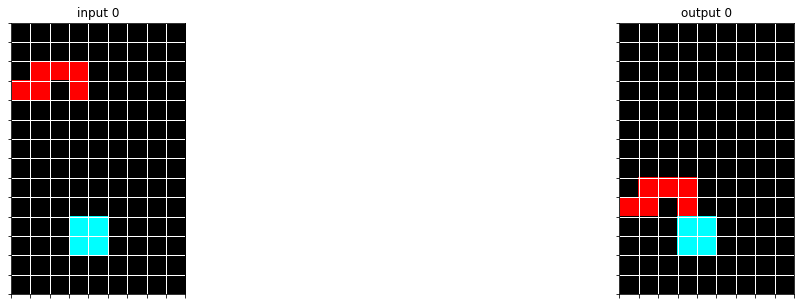

same shape:  True
(14, 9)
(14, 9)
same colors:  True
same size:  True
10
10
same color count:  True
Counter({0: 116, 2: 6, 8: 4})
Counter({0: 116, 2: 6, 8: 4})
color diff:  Counter({0: 0, 2: 0, 8: 0})
same objects, idp pos, fix col: 
[[0. 2. 2. 2.]
 [2. 2. 0. 2.]]
[[8. 8.]
 [8. 8.]]
same objects, fix pos, fix col: 
[[8. 8.]
 [8. 8.]]
same objects, fix pos, idp col: 
[[8. 8.]
 [8. 8.]]
same objects, idp pos, idp col: 
[[0. 2. 2. 2.]
 [2. 2. 0. 2.]]
[[8. 8.]
 [8. 8.]]
Diff:  [[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  2  2  2  0  0  0  0  0]
 [ 2  2  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0 -2 -2 -2  0  0  0  0  0]
 [-2 -2  0 -2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


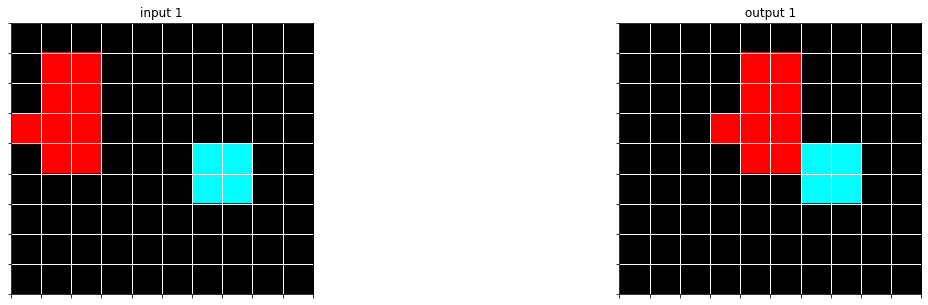

same shape:  True
(9, 10)
(9, 10)
same colors:  True
same size:  True
13
13
same color count:  True
Counter({0: 77, 2: 9, 8: 4})
Counter({0: 77, 2: 9, 8: 4})
color diff:  Counter({0: 0, 2: 0, 8: 0})
same objects, idp pos, fix col: 
[[0. 2. 2.]
 [0. 2. 2.]
 [2. 2. 2.]
 [0. 2. 2.]]
[[8. 8.]
 [8. 8.]]
same objects, fix pos, fix col: 
[[8. 8.]
 [8. 8.]]
same objects, fix pos, idp col: 
[[8. 8.]
 [8. 8.]]
same objects, idp pos, idp col: 
[[0. 2. 2.]
 [0. 2. 2.]
 [2. 2. 2.]
 [0. 2. 2.]]
[[8. 8.]
 [8. 8.]]
Diff:  [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  0 -2 -2  0  0  0  0]
 [ 0  2  2  0 -2 -2  0  0  0  0]
 [ 2  2  2 -2 -2 -2  0  0  0  0]
 [ 0  2  2  0 -2 -2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


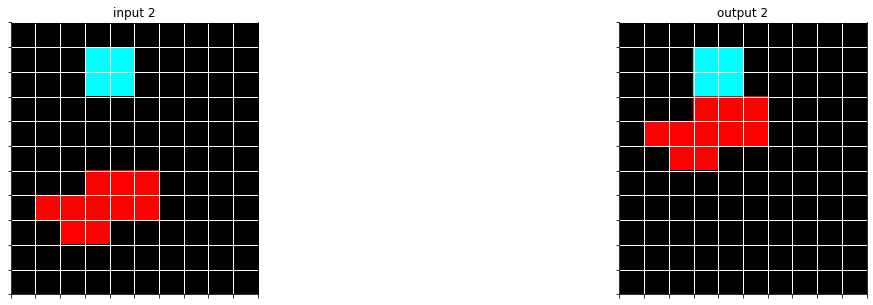

same shape:  True
(11, 10)
(11, 10)
same colors:  True
same size:  True
14
14
same color count:  True
Counter({0: 96, 2: 10, 8: 4})
Counter({0: 96, 2: 10, 8: 4})
color diff:  Counter({0: 0, 8: 0, 2: 0})
same objects, idp pos, fix col: 
[[8. 8.]
 [8. 8.]]
[[0. 0. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [0. 2. 2. 0. 0.]]
same objects, fix pos, fix col: 
[[8. 8.]
 [8. 8.]]
same objects, fix pos, idp col: 
[[8. 8.]
 [8. 8.]]
same objects, idp pos, idp col: 
[[8. 8.]
 [8. 8.]]
[[0. 0. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [0. 2. 2. 0. 0.]]
Diff:  [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -2 -2 -2  0  0  0  0]
 [ 0 -2 -2 -2 -2 -2  0  0  0  0]
 [ 0  0 -2 -2  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0  0  0]
 [ 0  2  2  2  2  2  0  0  0  0]
 [ 0  0  2  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


In [3]:
from preprocessing import Grid

trainDatas = jsonList[7]['train']

to_preprocess = np.array([[np.array(trainData['input']),np.array(trainData['output'])] for i, trainData in enumerate(trainDatas)], dtype=object)
preprocessed = pp.preprocess(to_preprocess)
correlations = cf.correlate(preprocessed)


for i, trainData in enumerate(trainDatas):
    helper.displayIO([[np.array(trainData['input']),f'input {i}'],[np.array(trainData['output']),f'output {i}']])
    inputGrid = Grid(np.array(trainDatas[i]['input']))
    outputGrid = Grid(np.array(trainDatas[i]['output']))
    print("same shape: ", correlations[i].sameShape)
    print(inputGrid.shape)
    print(outputGrid.shape)
    print("same colors: ", correlations[i].sameColors)
    print("same size: ", correlations[i].sameSize)
    print(inputGrid.size)
    print(outputGrid.size)
    print("same color count: ", correlations[i].sameColorCount)
    print(correlations[i].color_count( inputGrid ))
    print(correlations[i].color_count( outputGrid))
    print("color diff: ", correlations[i].colorDiff)
    print("same objects, idp pos, fix col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsIdpPosFixCol):
        print(sameObject.raw)
    print("same objects, fix pos, fix col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsFixPosFixCol):
        print(sameObject.raw)
    print("same objects, fix pos, idp col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsFixPosIdpCol):
        print(sameObject.raw)
    print("same objects, idp pos, idp col: ")
    for j, sameObject in enumerate(correlations[i].sameObjectsIdpPosIdpCol):
        print(sameObject.raw)
    print("Diff: ", correlations[i].diff)
